In [1]:
# ! pip install -r requirements.txt

## Pre-procesamiento

Se realiza una exploración inicial y pre-procesamiento de los datos a analizar:

In [2]:
import itertools

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import FuncFormatter
from pandas.api.types import CategoricalDtype
from scipy.stats import expon

In [3]:
url ='https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/master/sysarmy_survey_2022_processed.csv'
df = pd.read_csv(url)
df.head()

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
0,Argentina,Catamarca,Full-Time,Staff (planta permanente),300000.0,245000.0,True,NaN,NaN,NaN,...,Completo,Licenciatura en redes y comunicación de datos,UP - Universidad de Palermo,NaN,NaN,NaN,NaN,NaN,35,Varón Cis
1,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),900000.0,850000.0,True,Cobro todo el salario en dólares,300,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31,Varón Cis
2,Argentina,Chaco,Full-Time,Staff (planta permanente),120000.0,115000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27,Varón Cis
3,Argentina,Chaco,Full-Time,Remoto (empresa de otro país),440000.0,0.0,True,Cobro todo el salario en dólares,220,Cobro todo el salario criptomonedas,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21,Varón Cis
4,Argentina,Chaco,Full-Time,Staff (planta permanente),140000.0,125000.0,True,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32,Varón Cis


In [4]:
df.describe(include='all')

,work_country,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,numero,salary_in_usd,salary_last_dollar_value,salary_pay_cripto,...,profile_studies_level_state,profile_career,profile_university,profile_boot_camp,profile_boot_camp_carrer,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,profile_age,profile_gender
count,5358,5358,5358,5358,5.358000e+03,5.358000e+03,5358,1640,1063,161,...,2659,2556,2502,693,437,1718,1718.000000,1718,5358.000000,5358
unique,1,24,2,5,NaN,NaN,1,3,359,2,...,3,391,450,215,290,3,NaN,3,NaN,14
top,Argentina,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),NaN,NaN,True,Cobro parte del salario en dólares,130,Cobro todo el salario criptomonedas,...,Completo,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,No,no,No,NaN,Porcentaje de mi sueldo bruto,NaN,Varón Cis
freq,5358,2699,5106,4068,NaN,NaN,5358,663,50,100,...,1204,452,586,185,38,1166,NaN,1064,NaN,3902
mean,NaN,NaN,NaN,NaN,3.635105e+05,2.770108e+05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2206.673690,NaN,33.279395,NaN
std,NaN,NaN,NaN,NaN,5.439255e+05,4.019423e+05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,17389.853287,NaN,7.924729,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,18.000000,NaN
25%,NaN,NaN,NaN,NaN,1.500000e+05,1.186122e+05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,27.000000,NaN
50%,NaN,NaN,NaN,NaN,2.560000e+05,2.010000e+05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,32.000000,NaN
75%,NaN,NaN,NaN,NaN,4.126570e+05,2.940000e+05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,38.000000,NaN


In [5]:
df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'salary_monthly_BRUTO', 'salary_monthly_NETO',
       'numero', 'salary_in_usd', 'salary_last_dollar_value',
       'salary_pay_cripto', 'salary_%_cripto', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'Trabajo de', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?',
       'company_recommended', 'profile_studies_level',
       'profile_studies_le

Se renombran algunas columnas a fin de acceder a cada columna con la sintaxis de un método del objeto `DataFrae` y de acercar el código a las buenas prácticas de programación con Python:

In [6]:
df = df.rename(columns = {
    'salary_monthly_BRUTO': 'monthly_gross_salary',
    'salary_monthly_NETO': 'monthly_net_salary',
    'salary_%_cripto': 'crypto_salary_percentage',
    'Trabajo de': 'role',
    'Si trabajas bajo un esquema híbrido ¿Cuántos días a la semana vas a la oficina?': 'hybrid_office_days_per_week',
})

In [7]:
df.columns

Index(['work_country', 'work_province', 'work_dedication',
       'work_contract_type', 'monthly_gross_salary', 'monthly_net_salary',
       'numero', 'salary_in_usd', 'salary_last_dollar_value',
       'salary_pay_cripto', 'crypto_salary_percentage', 'salary_has_bonus',
       'salary_bonus_tied_to', 'salary_inflation_adjustment',
       'salary_percentage_inflation_adjustment',
       'salary_month_last_inflation_adjustment',
       'salary_comparison_last_semester', 'salary_benefit',
       'salary_satisfaction', 'role', 'profile_years_experience',
       'work_years_in_company', 'work_years_in_current_position',
       'work_people_in_charge_of', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'company_employee_number', 'work_work_modality',
       'hybrid_office_days_per_week', 'company_recommended',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university'

Las columnas de interés para este análisis son:
- `work_province`: dado que el dataset no contiene entradas fuera de Argentina, el análisis contempla la provincia de residencia.
- `work_dedication`: puede ser necesario normalizar según horas de trabajo.
- `monthly_gross_salary`: una de las columnas protagonistas del análisis *(a contraponer con salario neto)*.
- `monthly_net_salary`: idem gross salary.
- `salary_comparison_last_semester`: puede resultar interesante para analizar probabilidad de crecimiento salarial.
- `profile_years_experience`: diferentes seniorities implican diferentes remuneraciones en una relación si no es lineal, exponencial.
- `tools_platform`: diferentes stacks tecnológicos implican diferentes remuneraciones, puede resultar en un análisis más objetivo y certero al complementarlo con *lenguaje de programación*.
- `tools_programming_languages`: una de las columnas protagonistas del análisis.
- `tools_frameworks`: idem tools_platform.
- `tools_data_bases`: idem tools_platform.
- `tools_qa_testing`: idem tools_platform.

In [8]:
df = df[['work_province',
         'work_dedication',
         'monthly_gross_salary',
         'monthly_net_salary',
         'salary_comparison_last_semester',
         'profile_years_experience',
         'tools_platform',
         'tools_programming_languages',
         'tools_frameworks',
         'tools_data_bases',
         'tools_qa_testing']]
df.head()

,work_province,work_dedication,monthly_gross_salary,monthly_net_salary,salary_comparison_last_semester,profile_years_experience,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing
0,Catamarca,Full-Time,300000.0,245000.0,2,10.0,"Amazon Web Services, Linux, VMWare",Python,Ninguno de los anteriores,ElasticSearch,"Postman, Visual Studio Coded UI"
1,Chaco,Full-Time,900000.0,850000.0,4,2.0,Amazon Web Services,"CSS, HTML, Java, Javascript, SQL, TypeScript",React.js,PostgreSQL,Cypress
2,Chaco,Full-Time,120000.0,115000.0,2,2.0,Amazon Web Services,"Javascript, PHP, Python","Flask, Laravel, Vue.js",MariaDB,Ninguna de las anteriores
3,Chaco,Full-Time,440000.0,0.0,3,1.0,"Firebase, Serverless","Javascript, TypeScript","Node.js, React.js","ElasticSearch, MongoDB",Ninguna de las anteriores
4,Chaco,Full-Time,140000.0,125000.0,2,1.0,Amazon Web Services,"CSS, HTML, Javascript",React.js,MySQL,Ninguna de las anteriores


In [9]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)  # suppress scientific notation 

In [10]:
df.shape

(5358, 11)

Histogramas exploratorios de salarios y sus correspondientes frecuencias de respuesta entre las personas encuestadas:

In [11]:
def human_format(num, pos=1):
    """
    human formatting for big numbers
    """
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return "%.0f%s" % (num, ["", "K", "M", "G", "T", "P"][magnitude])


FORMATTER = FuncFormatter(human_format)

In [12]:
FIGSIZE, VSUBPLOTS_FIGSIZE, HSUBPLOTS_FIGSIZE, DPI = (12, 5), (15, 5), (15, 4), 100
PASTEL_PALETTE = sns.color_palette('pastel')
MAIN_PALETTE = itertools.cycle(PASTEL_PALETTE)
CATEGORICAL_PALETTE = sns.color_palette('Set2')
SECUENTIAL_PALETTE = sns.color_palette('flare')

statistics_of_interest = ['mean', 'std', '25%', '50%', '75%']

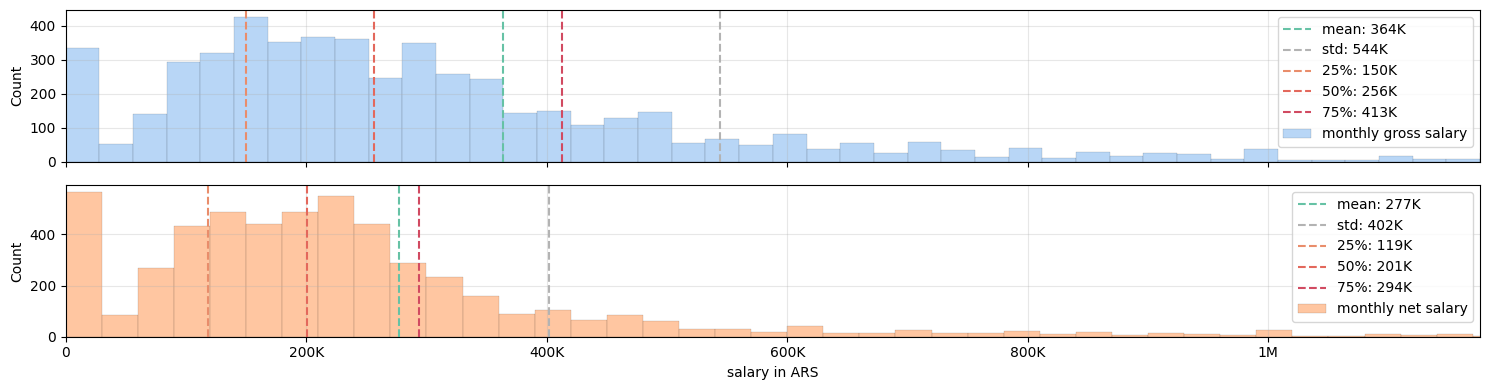

In [13]:
f, ax = plt.subplots(2, 1, figsize=HSUBPLOTS_FIGSIZE, dpi=DPI, sharex=True)
n_bins = 1000, 500

for i, salary in enumerate(['monthly_gross_salary', 'monthly_net_salary']):
    df_to_plot = df[salary]
    sns.histplot(df_to_plot, 
                 bins=n_bins[i],
                 ax=ax[i],
                 label=salary.replace('_', ' '),
                 color=next(MAIN_PALETTE),
                edgecolor='black')
    
    statistics = df_to_plot.describe(include='all')

    for j, name in enumerate(['mean', 'std']):
        statistic = statistics[name]
        ax[i].axvline(statistic,
                      label=f'{name}: {human_format(statistic)}',
                      color=CATEGORICAL_PALETTE.as_hex()[-j],
                      linestyle='dashed')
        
    for j, st in enumerate(['25%', '50%', '75%']):
        statistic = statistics[st]
        ax[i].axvline(statistic,
                      label=f'{st}: {human_format(statistic)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j],
                      linestyle='dashed')
        
    ax[i].xaxis.set_major_formatter(FORMATTER)
    ax[i].grid(alpha=0.3)
    ax[i].legend()
        


plt.xlim(0, statistics['75%'] * 4)
plt.xlabel('salary in ARS')
plt.tight_layout()

Se opta por analizar el salario **bruto** para los datos de interés, dada la falta de información y complejidad de estimación de las deducciones (impositivas, aportes jubilatorios, medicina pre-paga, etc).

### Formateo de datos

Se exploran, determinan los tipos adecuados de datos para cada columna de interés y se los formatea si fuera necesario:

In [14]:
df.dtypes

work_province                       object
work_dedication                     object
monthly_gross_salary               float64
monthly_net_salary                 float64
salary_comparison_last_semester      int64
profile_years_experience           float64
tools_platform                      object
tools_programming_languages         object
tools_frameworks                    object
tools_data_bases                    object
tools_qa_testing                    object
dtype: object

#### profile_years_experience

In [15]:
df.profile_years_experience.head(10)

0   10.00000
1    2.00000
2    2.00000
3    1.00000
4    1.00000
5    6.00000
6    1.00000
7    3.00000
8    0.00000
9    0.00000
Name: profile_years_experience, dtype: float64

Se agrupan y clasifican los valores para cantidad de años de experiencia en las categorías: '0-1', '1-2', '3-5', '6-10', '10+'

In [16]:
def years_of_exp_range(years) -> str:
    """
    given the number of experience, return the corresponding range:
    '0-1', '1-2', '3-5', '6-10', '10+'
    if the number if out of range or is not a number,
    return a numpy nan object
    """
    try:
        if years >= 0 and years < 1:
            return '0-1'
        if years >= 1 and years <= 2:
            return '1-2'
        if years >= 3 and years <= 5:
            return '3-5'
        if years >= 6 and years <= 10:
            return '6-10'
        if years >= 10:
            return '10+'
        else:
            return np.nan
    except TypeError:
        return np.nan

In [62]:
df.loc[:, 'profile_experience_range'] = df.copy().loc[:, 'profile_years_experience'].apply(years_of_exp_range)

In [63]:
df[['profile_years_experience', 'profile_experience_range']].head(10)

,profile_years_experience,profile_experience_range
0,10.00000,6-10
1,2.00000,1-2
2,2.00000,1-2
3,1.00000,1-2
4,1.00000,1-2
5,6.00000,6-10
6,1.00000,1-2
7,3.00000,3-5
9,0.00000,0-1
12,17.00000,10+


In [64]:
exp_range_cat = CategoricalDtype(
    categories=['0-1', '1-2', '3-5', '6-10', '10+'], ordered=True
)
df.loc[:, 'profile_experience_range'] = df.copy().profile_experience_range.astype(exp_range_cat)
df.profile_experience_range.dtype

dtype('O')

In [65]:
df.columns

Index(['work_province', 'work_dedication', 'monthly_gross_salary',
       'monthly_net_salary', 'salary_comparison_last_semester',
       'profile_years_experience', 'list_of_tools_platform',
       'list_of_tools_programming_languages', 'list_of_tools_frameworks',
       'list_of_tools_data_bases', 'list_of_tools_qa_testing',
       'mean_salary_in_top_tech', 'usd_monthly_gross_salary',
       'profile_experience_range'],
      dtype='object')

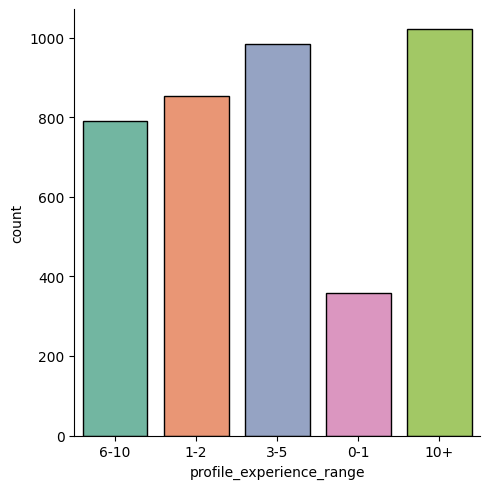

In [66]:
sns.catplot(data=df,
            x='profile_experience_range',
            kind='count',
            palette=CATEGORICAL_PALETTE,
           edgecolor='black')

In [67]:
df.columns

Index(['work_province', 'work_dedication', 'monthly_gross_salary',
       'monthly_net_salary', 'salary_comparison_last_semester',
       'profile_years_experience', 'list_of_tools_platform',
       'list_of_tools_programming_languages', 'list_of_tools_frameworks',
       'list_of_tools_data_bases', 'list_of_tools_qa_testing',
       'mean_salary_in_top_tech', 'usd_monthly_gross_salary',
       'profile_experience_range'],
      dtype='object')

#### salary_comparison_last_semester

In [68]:
df.astype({'salary_comparison_last_semester': 'float64'}).dtypes

work_province                            object
work_dedication                        category
monthly_gross_salary                    float64
monthly_net_salary                      float64
salary_comparison_last_semester         float64
profile_years_experience                float64
list_of_tools_platform                   object
list_of_tools_programming_languages      object
list_of_tools_frameworks                 object
list_of_tools_data_bases                 object
list_of_tools_qa_testing                 object
mean_salary_in_top_tech                 float64
usd_monthly_gross_salary                float64
profile_experience_range                 object
dtype: object

#### work_province

Las respuestas para `provincia` están normalizadas, seguramente dado el método de entrada de la encuesta.

In [109]:
df.work_province.unique()

array(['Chaco', 'Ciudad Autónoma de Buenos Aires', 'Córdoba',
       'Corrientes', 'Entre Ríos', 'Formosa', 'Jujuy', 'Mendoza',
       'Neuquén', 'Provincia de Buenos Aires', 'Río Negro', 'Salta',
       'San Juan', 'San Luis', 'Santa Fe', 'Tucumán'], dtype=object)

In [110]:
df.work_province.astype('category')

8                                 Chaco
18                                Chaco
97      Ciudad Autónoma de Buenos Aires
122     Ciudad Autónoma de Buenos Aires
146     Ciudad Autónoma de Buenos Aires
                     ...               
5121                           Santa Fe
5149                           Santa Fe
5197                           Santa Fe
5241                           Santa Fe
5347                            Tucumán
Name: work_province, Length: 188, dtype: category
Categories (16, object): ['Chaco', 'Ciudad Autónoma de Buenos Aires', 'Corrientes', 'Córdoba', ..., 'San Juan', 'San Luis', 'Santa Fe', 'Tucumán']

#### work_dedication

Se categoriza la columna `work_dedication` como sigue:

In [71]:
df.work_dedication.unique()

['full-time']
Categories (2, object): ['part-time' < 'full-time']

In [72]:
dedication_cat = CategoricalDtype(
    categories=['part-time', 'full-time'], ordered=True
)
df.work_dedication = df.work_dedication.apply(lambda x: x.lower()).astype(dedication_cat)

In [73]:
df.work_dedication

0       full-time
1       full-time
2       full-time
3       full-time
4       full-time
          ...    
5348    full-time
5351    full-time
5352    full-time
5355    full-time
5356    full-time
Name: work_dedication, Length: 4020, dtype: category
Categories (2, object): ['part-time' < 'full-time']

In [74]:
df.groupby(['work_dedication'])['monthly_gross_salary'].describe().style.format(
    {col: lambda x: human_format(x) for col in ['mean', 'std', 'min', '25%', '50%', '75%', 'max']},
    precision=2,
)

,count,mean,std,min,25%,50%,75%,max
work_dedication,,,,,,,,
part-time,0.00,nan,nan,nan,nan,nan,nan,nan
full-time,4020.00,415K,603K,62K,180K,290K,458K,28M


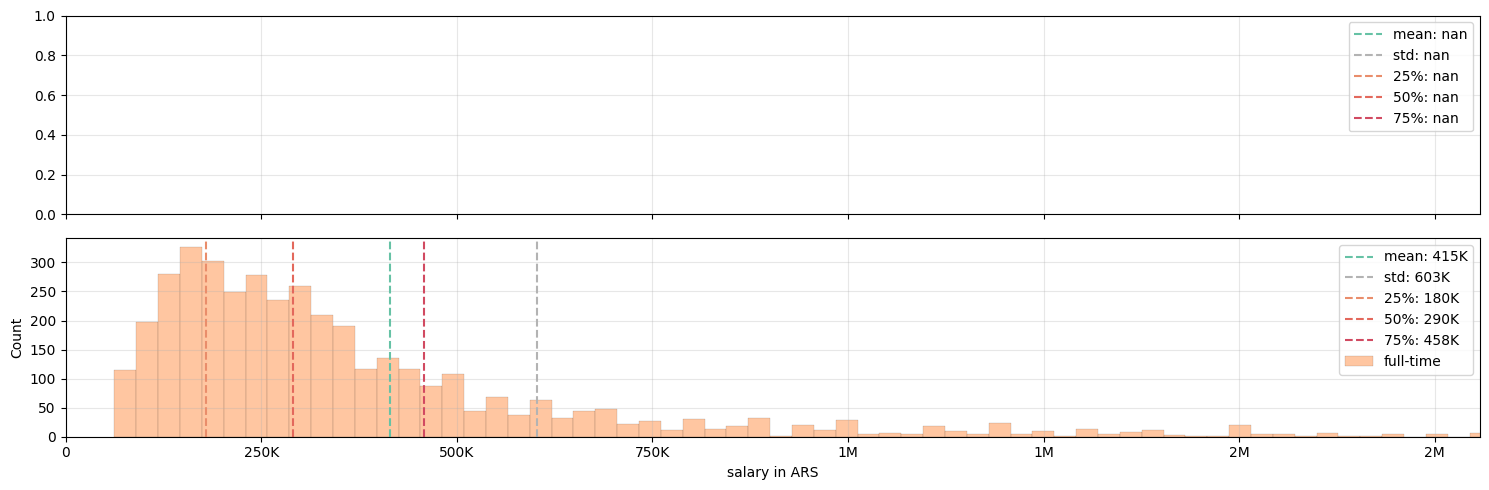

In [75]:
f, ax = plt.subplots(2, 1, figsize=VSUBPLOTS_FIGSIZE, dpi=DPI, sharex=True)
n_bins = 50, 1000

for i, dedication in enumerate(['part-time', 'full-time']):
    df_to_plot = df[df.work_dedication == dedication].monthly_gross_salary
    sns.histplot(df_to_plot, 
                 bins=n_bins[i],
                 label=dedication,
                 color=next(MAIN_PALETTE),
                edgecolor='black',
                 ax=ax[i],)
    
    statistics = df_to_plot.describe(include='all')

    for j, name in enumerate(['mean', 'std']):
        statistic = statistics[name]
        ax[i].axvline(statistic,
                      label=f'{name}: {human_format(statistic)}',
                      color=CATEGORICAL_PALETTE.as_hex()[-j],
                      linestyle='dashed')
        
    for j, st in enumerate(['25%', '50%', '75%']):
        statistic = statistics[st]
        ax[i].axvline(statistic,
                      label=f'{st}: {human_format(statistic)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j],
                      linestyle='dashed')
        
    ax[i].xaxis.set_major_formatter(FORMATTER)
    ax[i].grid(alpha=0.3)
    ax[i].legend()

plt.xlim(0, 3 * statistics['std'])
plt.xlabel('salary in ARS')
plt.tight_layout()

En base al histograma anterior, los diferentes valores de conteo y en particular de estadísticos, así como la imposibilidad de relacionar certeramente las horas de dedicación entre part-time *(podrían ser 4 horas diarias, algunas horas a la semana, unas pocas al mes, etc)* se resuelve analizar en dos diferentes datasets, las dos diferentes categorías correspondientes a `work_dedication` ('part-time' y 'full-time')

#### tools

Se transforman a `list` las columnas que contienen enumeraciones de lenguajes/plataformas/tecnologías para hacer el conteo de las mismas:

In [76]:
df.tools_programming_languages

AttributeError: 'DataFrame' object has no attribute 'tools_programming_languages'

In [ ]:
for col in ['tools_platform', 'tools_programming_languages', 'tools_frameworks', 'tools_data_bases', 'tools_qa_testing']:
    df[f'list_of_{col}'] = df[col].apply(
        lambda x: [
            entry.lower() for entry in str(x).split(', ') if 'Ningun' not in entry
        ] or np.nan)

In [ ]:
df.list_of_tools_programming_languages

In [ ]:
df = df[['work_province',
         'work_dedication',
         'monthly_gross_salary',
         'monthly_net_salary',
         'salary_comparison_last_semester',
         'profile_years_experience',
         'list_of_tools_platform',
         'list_of_tools_programming_languages',
         'list_of_tools_frameworks',
         'list_of_tools_data_bases',
         'list_of_tools_qa_testing']]
df.head()

### Filtrado de filas

Se "dropean" aquellas filas del DataFrame que al cabo del formateo de las columnas de interés, resulten en `NaN` en la columna `list_of_tools_programming_languages`, dado que es la columna protagonista junto con las de salarios.

In [ ]:
df.size

In [ ]:
df[df.list_of_tools_programming_languages.isna()]

In [ ]:
df = df.dropna(subset=['list_of_tools_programming_languages'])

In [ ]:
df.size

In [ ]:
df.head()

In [ ]:
df.describe(include='all').style.format(
    {'monthly_gross_salary': '${:,.2f}',
     'monthly_net_salary': '${:,.2f}'},
    precision=2,
    na_rep='missing'
).highlight_null(color='gray').bar(subset=['monthly_gross_salary', 
                                           'monthly_net_salary',
                                           'profile_years_experience'], color='green')

### Outliers

#### inferior

Se define el límite inferior para descarte de outliers como sigue:

##### full-time

- Valores por debajo del **salario mínimo vital y móvil en Argentina en el año correspondiente al dataset (2022)**:
    - ARS $61953 [Según el Consejo Nac del Empleo, la Productividad y el Salario Mínimo, Vital y Móvil](https://www.argentina.gob.ar/trabajo/consejodelsalario)

##### part-time

Dado que no se cuenta con información sobre las horas de dedicación aproximadas para trabajos *part-time*, y que éstos pueden ser del tipo *"freelos"* significando un ingreso extra para la persona encuestada, se determina el percentil aproximado correspondiente al valor mínimo para salarios full-time anteriormente establecido, para aplicar esta misma *proporción* al sub data set de part-time.

> Cabe aclarar que los valores antes expuestos se emplean como *guía* para eliminar outliers, pero no necesariamente estos valores mínimos sean reales, suficientes, ni dignos en la práctica.

In [ ]:
df_part_time = df.groupby('work_dedication').get_group('part-time')
df_full_time = df.groupby('work_dedication').get_group('full-time')

In [ ]:
df_part_time.size, df_full_time.size

In [ ]:
min_full_time_gross_salary = 61_953
df_full_time_without_low_outliers = df_full_time[df_full_time.monthly_gross_salary > min_full_time_gross_salary]

In [ ]:
df_full_time_without_low_outliers.size

In [ ]:
f, ax = plt.subplots(2, 1, figsize=VSUBPLOTS_FIGSIZE, dpi=DPI, sharex=True)

for i, df in enumerate([df_full_time, df_full_time_without_low_outliers]):
    df_to_plot = df.monthly_gross_salary
    sns.histplot(df_to_plot, 
                 ax=ax[i],
                 color=next(MAIN_PALETTE),
                 edgecolor='red',
                kde=True)
    
    statistics = df_to_plot.describe(include='all')

    for j, name in enumerate(['mean', 'std']):
        statistic = statistics[name]
        ax[i].axvline(statistic,
                      label=f'{name}: {human_format(statistic)}',
                      color=CATEGORICAL_PALETTE.as_hex()[-j],
                      linestyle='dashed',)
        
    for j, st in enumerate(['25%', '50%', '75%']):
        statistic = statistics[st]
        ax[i].axvline(statistic,
                      label=f'{st}: {human_format(statistic)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j],
                      linestyle='dashed')
        
    if i == 0:
        ax[i].axvline(min_full_time_gross_salary,
                      label=f'min full-time gross salary: {human_format(min_full_time_gross_salary)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j+1],
                      linestyle='dashed')
        
    ax[i].xaxis.set_major_formatter(FORMATTER)
    ax[i].grid(alpha=0.3)
    ax[i].legend()

plt.xlim(0, 3 * statistics['std'])
plt.xlabel('salary in ARS')
plt.title('extracting full time low outliers')
plt.tight_layout()

Se determina a qué percentile corresponde la entrada de salario cuyo valor se acerca más al límite inferior de outliers antes definido:

In [77]:
distance_to_min_salary = df_full_time.monthly_gross_salary.apply(
    lambda x: (x - min_full_time_gross_salary)
).apply(lambda n: -n if n < 0 else n)
distance_to_min_salary

0      238047.00000
1      838047.00000
2       58047.00000
3      378047.00000
4       78047.00000
           ...     
5348   238047.00000
5351    48047.00000
5352    58047.00000
5355   168047.00000
5356   389036.00000
Name: monthly_gross_salary, Length: 4020, dtype: float64

In [78]:
min_idx = distance_to_min_salary.idxmin()
distance_to_min_salary.loc[min_idx]

347.0

In [79]:
df_full_time.monthly_gross_salary.rank(pct=True)

0      0.52786
1      0.91716
2      0.08358
3      0.73159
4      0.12948
         ...  
5348   0.52786
5351   0.06306
5352   0.08358
5355   0.36953
5356   0.74776
Name: monthly_gross_salary, Length: 4020, dtype: float64

In [80]:
min_full_time_salary_percentile = df_full_time.monthly_gross_salary.rank(pct=True).loc[min_idx]
min_full_time_salary_percentile

0.0002487562189054726

Dado que los datasets presentan la misma naturaleza/comportamiento, ante la incertidumbre de un valor para el límite inferior del rango de outliers para dedicación 'part-time', se aplica el percentil $0.048$ antes calculado:

In [81]:
min_part_time_gross_salary = df_part_time.monthly_gross_salary.quantile(min_full_time_salary_percentile)
min_part_time_gross_salary

25523.507462686568

In [82]:
df_part_time_without_low_outliers = df_part_time[df_part_time.monthly_gross_salary > min_part_time_gross_salary]

In [83]:
df_part_time.size, df_part_time_without_low_outliers.size

(2280, 2268)

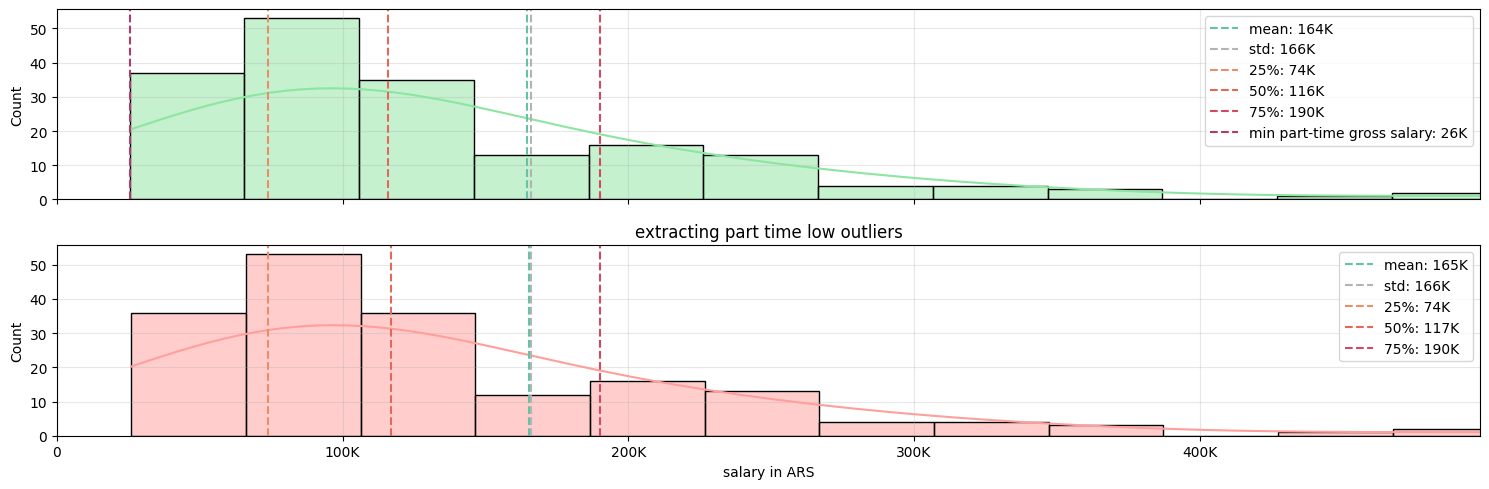

In [84]:
f, ax = plt.subplots(2, 1, figsize=VSUBPLOTS_FIGSIZE, dpi=DPI, sharex=True)

for i, df in enumerate([df_part_time, df_part_time_without_low_outliers]):
    df_to_plot = df.monthly_gross_salary
    sns.histplot(df_to_plot, 
                 ax=ax[i],
                 color=next(MAIN_PALETTE),
                kde=True)
    
    statistics = df_to_plot.describe(include='all')

    for j, name in enumerate(['mean', 'std']):
        statistic = statistics[name]
        ax[i].axvline(statistic,
                      label=f'{name}: {human_format(statistic)}',
                      color=CATEGORICAL_PALETTE.as_hex()[-j],
                      linestyle='dashed')
        
    for j, st in enumerate(['25%', '50%', '75%']):
        statistic = statistics[st]
        ax[i].axvline(statistic,
                      label=f'{st}: {human_format(statistic)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j],
                      linestyle='dashed')
        
    if i == 0:
        ax[i].axvline(min_part_time_gross_salary,
                      label=f'min part-time gross salary: {human_format(min_part_time_gross_salary)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j+1],
                      linestyle='dashed')
        
    ax[i].xaxis.set_major_formatter(FORMATTER)
    ax[i].grid(alpha=0.3)
    ax[i].legend()

plt.xlim(0, 3 * statistics['std'])
plt.xlabel('salary in ARS')
plt.title('extracting part time low outliers')
plt.tight_layout()

Debido a la complejidad de análisis y comparación de sueldos a lo largo del tiempo en Argentina, por las fluctuaciones en las variables económicas, se trabaja con la conversión a dólar estado unidense dado por un valor *"en el medio"* de los valores medios de las cotizaciones *oficial* y *blue* durante el año 2022.

> A sabiendas de que el dolar oficial no es en la práctica la cotización mayoritariamente empleada, mientras que la cotización blue no está regulada.

In [85]:
def ars_to_usd(ars: float) -> float:
    """
    ARS to USD conversion according to https://dolarhistorico.com/cotizacion-dolar-oficial/2022
    and https://dolarhistorico.com/cotizacion-dolar-blue/2022
    """
    ars_per_usd_blue = (347 + 343)/2
    ars_per_usd_oficial = (184.12 + 175.12)/2
    ars_per_usd = (ars_per_usd_blue + ars_per_usd_oficial) / 2
    return ars / ars_per_usd

In [86]:
# this cell needs to be run manually ! SettingWithCopyWarning does not disappear :'(

df.loc[:, 'usd_monthly_gross_salary'] = df.copy().loc[:, 'monthly_gross_salary'].apply(ars_to_usd)

In [87]:
df_full_time = df_full_time_without_low_outliers
df_part_time = df_part_time_without_low_outliers

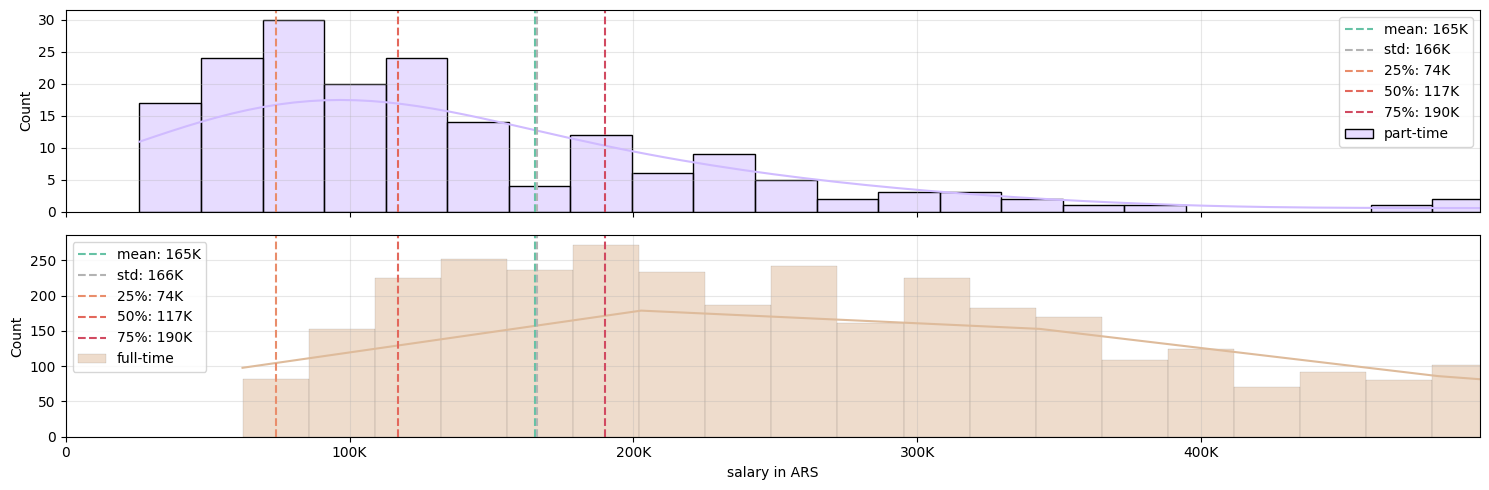

In [88]:
f, ax = plt.subplots(2, 1, figsize=VSUBPLOTS_FIGSIZE, dpi=DPI, sharex=True)
n_bins = 50, 1200

for i, df in enumerate([df_part_time, df_full_time]):
    sns.histplot(df,
                 x='monthly_gross_salary',
                 bins=n_bins[i],
                 ax=ax[i],
                 label=df.work_dedication.unique()[0],
                 color=next(MAIN_PALETTE),
                 edgecolor='black',  # this is not working well...
                 kde=True)
    
    statistics = df_to_plot.describe(include='all')

    for j, name in enumerate(['mean', 'std']):
        statistic = statistics[name]
        ax[i].axvline(statistic,
                      label=f'{name}: {human_format(statistic)}',
                      color=CATEGORICAL_PALETTE.as_hex()[-j],
                      linestyle='dashed')
        
    for j, st in enumerate(['25%', '50%', '75%']):
        statistic = statistics[st]
        ax[i].axvline(statistic,
                      label=f'{st}: {human_format(statistic)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j],
                      linestyle='dashed')
        
    ax[i].xaxis.set_major_formatter(FORMATTER)
    ax[i].grid(alpha=0.3)
    ax[i].legend()

plt.xlim(0, 3 * statistics['std'])
plt.xlabel('salary in ARS')
plt.tight_layout()

- Las envolventes sugieren curvas de comportamiento exponencial **normal o gaussiano**.
- Dado que ambos conjuntos de datos provienen de la misma fuente, se trata a ambos con referencia en la **función de distribución de probabilidad Normal y Gaussiana**.

#### superior

##### full-time

La regla de $n \sigma$, $n \in \mathbb{Z}$ a la derecha del valor medio puede resultar una buena forma de eliminar outliers a la derecha de $\mu$, sin embargo:
- es sabido que un salario en IT puede alcanzar variados y *elevados* valores
- contemplando algunos pocos, pero muy elevados valores, éstos pueden desplazar de manera significativa los estadísticos del dataset (hacia la derecha).

De manera que, teniendo en cuenta que el enfoque propuesto está fuertemente ligado a los **lenguajes de programación** del stack de las personas encuestadas vs sus salarios, se confecciona el siguiente procedimiento para eliminar outliers superiores:

Se fija como referencia de salarios elevados el top de tecnologías mejores pagas en IT de la [encuesta de Stackoverflow 2022](https://survey.stackoverflow.co/2022/):

In [89]:
TOP_TECH_2022_SURVEY = {'Clojure': 106_644, 'Erlang': 103_000, 'F#': 95_526, 'LISP': 95_000, 'Ruby': 93_000,
                         'Elixir': 92_959, 'Scala': 92_780, 'Perl': 90_073, 'Go': 89_204, 'Rust': 87_047,
                         'OCaml': 86_948, 'Groovy': 85_320, 'Crystal': 84_690, 'Objective-C': 83_165,
                         'Bash/Shell': 81_666, 'Haskell': 80_250, 'Fortran': 80_000, 'Lua': 79_568,
                         'Swift': 78_468, 'PowerShell': 78_084, 'Julia': 77_966, 'APL': 75_932, 'COBOL': 75_592,
                         'Assembly': 75_000, 'Python': 71_105, 'Solidity': 70_368, 'TypeScript': 70_276, 'C#': 69_516,
                         'Kotlin': 69_318, 'SQL': 69_108, 'C++': 68_000, 'R': 67_734, 'C': 67_186, 'JavaScript': 65_580,
                         'Java': 64_572, 'SAS': 64_243, 'Delphi': 63_984, 'HTML/CSS': 63_984, 'VBA': 62_328,
                         'MATLAB': 57_588, 'PHP': 50_496, 'Dart': 43_724,}

In [90]:
def salary_in_top_tech(tools: list[str]) -> float:
    """
    Return the max salary value if any tool name is in the top tech tools 2022 survey
    """
    top_tools_salaries = []
    for tool in tools:
        for top_tech in TOP_TECH_2022_SURVEY.keys():
            if tool in top_tech.lower():
                top_tools_salaries.append(TOP_TECH_2022_SURVEY[top_tech] / 12)  # anual to monthly
    if not top_tools_salaries:
        return np.nan
    return max(top_tools_salaries)

Se crea una nueva columna a fin de comparar el máximo salario de tecnologías extraído de la encuesta 2022 de Stackoverflow con los salarios en análisis, así como un ratio entre estos dos últimos, para poder así establecer si se trata de un salario elevado factible o no:

In [91]:
df['mean_salary_in_top_tech'] = df.list_of_tools_programming_languages.apply(salary_in_top_tech)
df['ratio_top_tech'] = df.usd_monthly_gross_salary.div(df.mean_salary_in_top_tech)

In [92]:
higher_than_mu_mask = df_full_time.monthly_gross_salary > df_full_time.monthly_gross_salary.mean()

df_full_time[
    higher_than_mu_mask
].sort_values(
    by='usd_monthly_gross_salary', ascending=False
)[
    ['usd_monthly_gross_salary', 'list_of_tools_programming_languages', 'mean_salary_in_top_tech', 'ratio_top_tech']
].head(50).style.format(
    {col: human_format for col in ['usd_monthly_gross_salary', 'mean_salary_in_top_tech']},  # '${:,.2f}'},
    precision=1,
).bar(subset=['usd_monthly_gross_salary', 'mean_salary_in_top_tech'], color='green'
     ).applymap(lambda x: 'background-color: red' if x > 1.3 else '', subset=['ratio_top_tech'])

,usd_monthly_gross_salary,list_of_tools_programming_languages,mean_salary_in_top_tech,ratio_top_tech
4507,107K,"['html', 'javascript', 'php', 'python', 'typescript']",6K,18.0
3086,30K,"['go', 'python']",7K,4.1
4775,19K,"['go', 'java', 'ruby', 'sql']",8K,2.5
2388,14K,"['bash/shell', 'css', 'html', 'javascript', 'typescript']",7K,2.1
975,13K,['java'],5K,2.3
4397,13K,"['css', 'go', 'html', 'javascript', 'sql']",7K,1.7
1369,12K,"['php', 'typescript']",6K,2.1
2842,11K,"['bash/shell', 'javascript', 'terraform']",7K,1.7
4124,11K,"['python', 'scala', 'sql']",8K,1.5
4406,11K,"['go', 'javascript', 'typescript']",7K,1.5


Se pueden visualizar algunos salarios *elevados* respecto al $\mu$ del dataset, que se condicen con los salarios factibles de referencia, y que:
- aplicando la regla de las desviaciones estandard, se hubiesen descartado como outliers
- conservandolos *(véase salario del index 4507 de 81k usd)* desplazan los estadísticos hacia la derecha

Se descartan entonces las entradas con salarios elevados (por encima de $\mu$), que presentan un ratio respecto a la refencia de **más de 1.3** (dado que los valores de referencia son un "top"):

In [93]:
no_fake_high_salary_mask = df_full_time.ratio_top_tech < 1.1
df_full_time_without_fake_high_salaries = df_full_time[no_fake_high_salary_mask]
df_full_time_without_fake_high_salaries.sort_values(
    by='usd_monthly_gross_salary', ascending=False
)[
    ['usd_monthly_gross_salary', 'list_of_tools_programming_languages']
].head(30).style.format(
    {'usd_monthly_gross_salary': human_format},  # '${:,.2f}'},
    precision=1,
).bar(subset=['usd_monthly_gross_salary'], color='green')

,usd_monthly_gross_salary,list_of_tools_programming_languages
3253,10K,"['c', 'c++', 'dart', 'go', 'java', 'javascript', 'python']"
1471,8K,"['bash/shell', 'go', 'javascript', 'python', 'scala', 'sql']"
3920,8K,"['go', 'erlang', 'java', 'python', 'scala', 'sql']"
2396,8K,"['css', 'javascript', 'ruby', 'typescript']"
549,8K,"['bash/shell', 'go', 'python']"
4217,8K,"['go', 'typescript']"
341,8K,"['go', 'python', 'ruby', 'rust', 'typescript']"
3792,8K,"['go', 'ruby', 'typescript']"
3520,8K,"['c#', 'groovy', 'html', 'javascript', 'python', 'sql']"
391,8K,"['bash/shell', 'javascript', 'rust', 'sql', 'typescript']"


In [94]:
df_full_time.size, df_full_time_without_fake_high_salaries.size

(60300, 57975)

In [95]:
max_full_time_gross_salary = df_full_time_without_fake_high_salaries.usd_monthly_gross_salary.max()

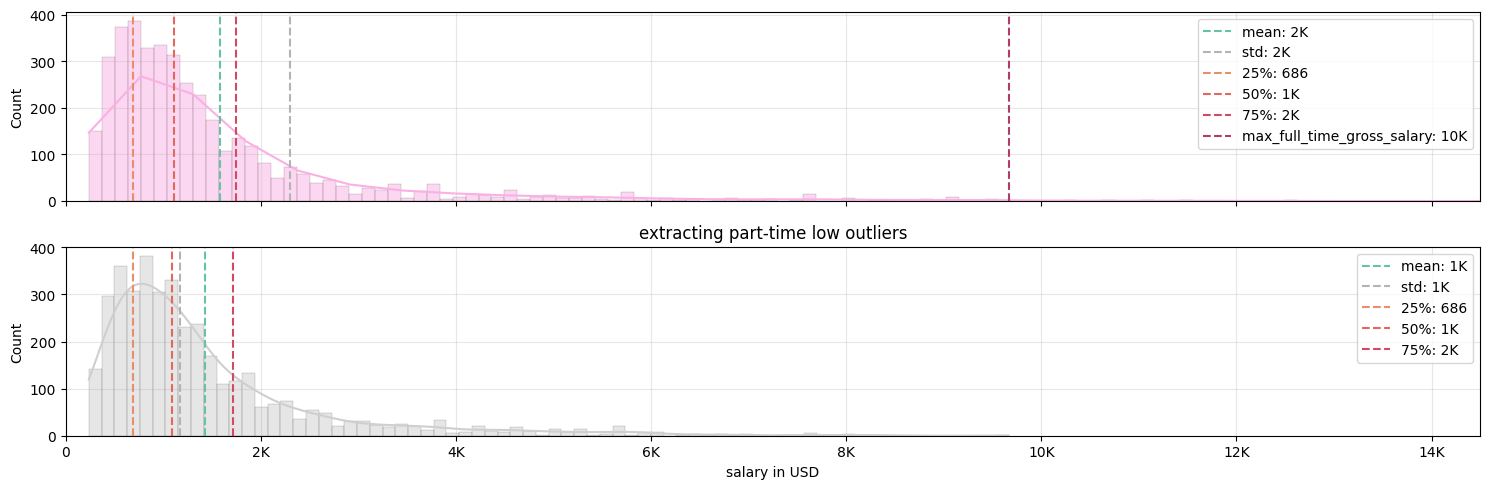

In [96]:
f, ax = plt.subplots(2, 1, figsize=VSUBPLOTS_FIGSIZE, dpi=DPI, sharex=True)

for i, df in enumerate([df_full_time, df_full_time_without_fake_high_salaries]):
    df_to_plot = df.usd_monthly_gross_salary
    sns.histplot(df_to_plot, 
                 ax=ax[i],
                 color=next(MAIN_PALETTE),
                kde=True)
    
    statistics = df_to_plot.describe(include='all')

    for j, name in enumerate(['mean', 'std']):
        statistic = statistics[name]
        ax[i].axvline(statistic,
                      label=f'{name}: {human_format(statistic)}',
                      color=CATEGORICAL_PALETTE.as_hex()[-j],
                      linestyle='dashed')
        
    for j, st in enumerate(['25%', '50%', '75%']):
        statistic = statistics[st]
        ax[i].axvline(statistic,
                      label=f'{st}: {human_format(statistic)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j],
                      linestyle='dashed')
        
    if i == 0:
        ax[i].axvline(max_full_time_gross_salary,
                      label=f'max_full_time_gross_salary: {human_format(max_full_time_gross_salary)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j+1],
                      linestyle='dashed')
        
    ax[i].xaxis.set_major_formatter(FORMATTER)
    ax[i].grid(alpha=0.3)
    ax[i].legend()

plt.xlim(0, 1.5 * max_full_time_gross_salary)
plt.xlabel('salary in USD')
plt.title('extracting part-time low outliers')
plt.tight_layout()

#### superior

##### part-time


Se determina a qué percentile corresponde la entrada de salario cuyo valor se acerca más al límite superior de outliers antes definido:

In [97]:
distance_to_max_salary = df_full_time.usd_monthly_gross_salary.apply(
    lambda x: (x - max_full_time_gross_salary)
).apply(lambda n: -n if n < 0 else n)
distance_to_max_salary

0      8520.45290
1      6233.08299
2      9206.66387
3      7986.73325
4      9130.41821
          ...    
5348   8520.45290
5351   9244.78670
5352   9206.66387
5355   8787.31272
5356   7944.84007
Name: usd_monthly_gross_salary, Length: 4020, dtype: float64

In [98]:
min_idx = distance_to_max_salary.idxmin()
min_idx, distance_to_max_salary.loc[min_idx]

(3253, 0.0)

In [99]:
df_full_time.usd_monthly_gross_salary.rank(pct=True)

0      0.52786
1      0.91716
2      0.08358
3      0.73159
4      0.12948
         ...  
5348   0.52786
5351   0.06306
5352   0.08358
5355   0.36953
5356   0.74776
Name: usd_monthly_gross_salary, Length: 4020, dtype: float64

In [100]:
max_full_time_salary_percentile = df_full_time.usd_monthly_gross_salary.rank(pct=True).loc[min_idx]
max_full_time_salary_percentile

0.9957711442786069

Dado que los datasets presentan la misma naturaleza/comportamiento, ante la incertidumbre de un valor para el límite inferior del rango de outliers para dedicación 'part-time', se aplica el percentil ~$0.9956$ antes calculado:

In [101]:
max_part_time_gross_salary = df_part_time.usd_monthly_gross_salary.quantile(max_full_time_salary_percentile)
max_part_time_gross_salary

3595.153734586569

In [102]:
no_fake_high_salary_mask = df_part_time.usd_monthly_gross_salary < max_part_time_gross_salary
df_part_time_without_fake_high_salaries = df_part_time[no_fake_high_salary_mask]
df_part_time_without_fake_high_salaries.sort_values(
    by='usd_monthly_gross_salary', ascending=False
)[
    ['usd_monthly_gross_salary', 'list_of_tools_programming_languages']
].head(30).style.format(
    {'usd_monthly_gross_salary': human_format},  # '${:,.2f}'},
    precision=1,
).bar(subset=['usd_monthly_gross_salary'], color='green')

,usd_monthly_gross_salary,list_of_tools_programming_languages
513,3K,['html']
964,3K,"['python', 'r']"
4325,3K,"['css', 'html', 'javascript', 'ecosistema shopify']"
3801,3K,"['bash/shell', 'python', 'sql']"
4385,3K,"['.net', 'arduino', 'bash/shell', 'c#', 'html', 'javascript', 'sql']"
2189,3K,"['php', 'python']"
1736,2K,"['go', 'html', 'javascript', 'php', 'python']"
4329,2K,"['groovy', 'html', 'java', 'javascript', 'sql']"
4550,2K,"['css', 'html', 'java', 'javascript', 'php', 'sql']"
1325,2K,['python']


In [103]:
df_part_time.size, df_part_time_without_fake_high_salaries.size

(2268, 2256)

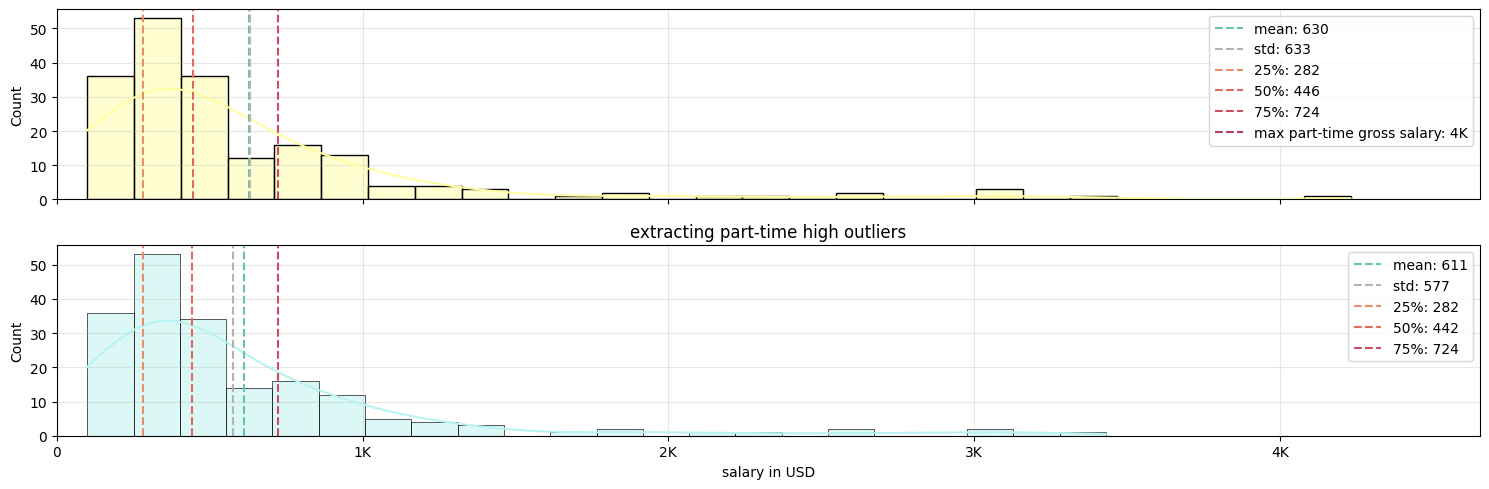

In [104]:
f, ax = plt.subplots(2, 1, figsize=VSUBPLOTS_FIGSIZE, dpi=DPI, sharex=True)

for i, df in enumerate([df_part_time, df_part_time_without_fake_high_salaries]):
    df_to_plot = df.usd_monthly_gross_salary
    sns.histplot(df_to_plot, 
                 ax=ax[i],
                 color=next(MAIN_PALETTE),
                kde=True)
    
    statistics = df_to_plot.describe(include='all')

    for j, name in enumerate(['mean', 'std']):
        statistic = statistics[name]
        ax[i].axvline(statistic,
                      label=f'{name}: {human_format(statistic)}',
                      color=CATEGORICAL_PALETTE.as_hex()[-j],
                      linestyle='dashed')
        
    for j, st in enumerate(['25%', '50%', '75%']):
        statistic = statistics[st]
        ax[i].axvline(statistic,
                      label=f'{st}: {human_format(statistic)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j],
                      linestyle='dashed')
        
    if i == 0:
        ax[i].axvline(min_part_time_gross_salary,
                      label=f'max part-time gross salary: {human_format(max_part_time_gross_salary)}',
                      color=SECUENTIAL_PALETTE.as_hex()[j+1],
                      linestyle='dashed')
        
    ax[i].xaxis.set_major_formatter(FORMATTER)
    ax[i].grid(alpha=0.3)
    ax[i].legend()

plt.xlim(0, 1.1 * df_part_time.usd_monthly_gross_salary.max())
plt.xlabel('salary in USD')
plt.title('extracting part-time high outliers')
plt.tight_layout()

Quedan así definidos los datasets para su visualización y análisis

In [105]:
df_part_time.columns

Index(['work_province', 'work_dedication', 'monthly_gross_salary',
       'monthly_net_salary', 'salary_comparison_last_semester',
       'profile_years_experience', 'list_of_tools_platform',
       'list_of_tools_programming_languages', 'list_of_tools_frameworks',
       'list_of_tools_data_bases', 'list_of_tools_qa_testing',
       'usd_monthly_gross_salary'],
      dtype='object')

In [106]:
df_part_time.head(30).style.format(
    {col: human_format for col in ['monthly_gross_salary', 'monthly_net_salary', 'usd_monthly_gross_salary']},
    precision=1,
).bar(subset=['monthly_gross_salary', 'monthly_net_salary', 'usd_monthly_gross_salary'], color='green')

,work_province,work_dedication,monthly_gross_salary,monthly_net_salary,salary_comparison_last_semester,profile_years_experience,list_of_tools_platform,list_of_tools_programming_languages,list_of_tools_frameworks,list_of_tools_data_bases,list_of_tools_qa_testing,usd_monthly_gross_salary
8,Chaco,part-time,55K,46K,2,0.0,nan,['sql'],nan,"['mysql', 'postgresql']","['lippia', 'postman']",210
18,Chaco,part-time,50K,45K,1,1.0,['google'],"['css', 'html', 'java', 'python', 'sql']","['django', 'spring']","['microsoft azure (tables', 'cosmosdb', 'sql', 'etc)', 'mysql']",['postman'],191
97,Ciudad Autónoma de Buenos Aires,part-time,55K,690K,4,0.0,"['docker', 'firebase', 'google cloud platform', 'heroku']","['javascript', 'python']","['node.js', 'react.js']","['mariadb', 'microsoft sql server', 'mongodb', 'mysql', 'teradata']",nan,210
122,Ciudad Autónoma de Buenos Aires,part-time,222K,189K,3,1.0,"['docker', 'linux']","['javascript', 'python', 'sql']","['django', 'vue.js']","['mariadb', 'postgresql']",['postman'],846
146,Ciudad Autónoma de Buenos Aires,part-time,120K,120K,1,4.0,['windows server'],"['css', 'python']","['django', 'vue.js']","['mysql', 'sqlite']","['visual studio coded ui', 'xunit']",457
163,Ciudad Autónoma de Buenos Aires,part-time,130K,120K,2,0.0,nan,"['javascript', 'sql']","['bootstrap', 'node.js', 'react.js']","['microsoft sql server', 'mongodb']",nan,496
181,Ciudad Autónoma de Buenos Aires,part-time,91K,75K,3,1.0,"['docker', 'firebase', 'google cloud platform']",['javascript'],['react.js'],nan,nan,345
189,Ciudad Autónoma de Buenos Aires,part-time,101K,84K,3,2.0,"['amazon web services', 'docker', 'firebase', 'linux']","['css', 'html', 'javascript', 'typescript']","['node.js', 'react.js', 'react native']",['postgresql'],['jest'],384
197,Ciudad Autónoma de Buenos Aires,part-time,130K,0,4,3.0,['linux'],"['java', 'javascript']","['node.js', 'vue.js']",nan,nan,496
209,Ciudad Autónoma de Buenos Aires,part-time,98K,83K,3,1.0,"['amazon web services', 'azure']","['.net', 'c#', 'css', 'html', 'javascript', 'typescript']","['.net core', 'bootstrap', 'jquery', 'node.js', 'react.js']","['microsoft sql server', 'postgresql']",nan,374


In [107]:
df_part_time.head()

,work_province,work_dedication,monthly_gross_salary,monthly_net_salary,salary_comparison_last_semester,profile_years_experience,list_of_tools_platform,list_of_tools_programming_languages,list_of_tools_frameworks,list_of_tools_data_bases,list_of_tools_qa_testing,usd_monthly_gross_salary
8,Chaco,part-time,55000.00000,45650.00000,2,0.00000,NaN,[sql],NaN,"[mysql, postgresql]","[lippia, postman]",209.67557
18,Chaco,part-time,50000.00000,45000.00000,1,1.00000,[google],"[css, html, java, python, sql]","[django, spring]","[microsoft azure (tables, cosmosdb, sql, etc),...",[postman],190.61416
97,Ciudad Autónoma de Buenos Aires,part-time,55000.00000,690000.00000,4,0.00000,"[docker, firebase, google cloud platform, heroku]","[javascript, python]","[node.js, react.js]","[mariadb, microsoft sql server, mongodb, mysql...",NaN,209.67557
122,Ciudad Autónoma de Buenos Aires,part-time,222000.00000,189000.00000,3,1.00000,"[docker, linux]","[javascript, python, sql]","[django, vue.js]","[mariadb, postgresql]",[postman],846.32687
146,Ciudad Autónoma de Buenos Aires,part-time,120000.00000,120000.00000,1,4.00000,[windows server],"[css, python]","[django, vue.js]","[mysql, sqlite]","[visual studio coded ui, xunit]",457.47398


In [111]:
# TODO: profile_years_experience_range is missing